In this part, we inspect our models performances with respect to a minority class: Mobile money transaction (around 2% of the whole dataset). We plot a ROC-AUC Curve for all of our models to compare performance. 

In [2]:
!pip install stop_words
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stop_words import get_stop_words
import os
from datetime import datetime
import pickle

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=da4f5708e70bbd123b5b493a8442a78cd19cd214ea8355f274e99d389781ed8d
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [3]:
# Dependencies for the ROC-AUC plot 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial

# /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/ mypath

Mounted at /content/drive
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


In [5]:
x_path = "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/XoheImp.csv" 
y_path = "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/Y.csv"

In [6]:
#Set X and y values
X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

Recoding Y as a binary variable with mobile money = 1 and the rest = 0

In [7]:
from sklearn.preprocessing import label_binarize #one-vs-all scheme
yb = label_binarize(["b'Mobile money transfer (M-PESA, Airtel Money, Orange Money, Yu Cash, Tangaza, etc)'"], classes= y['trx_mode_desc'])

In [8]:
yb.size

722068

In [9]:
y = pd. DataFrame(yb) 
y = y.transpose()

In [ ]:
y.head

Starting with machine learning preprocessing using Ximp and Y

In [10]:
# Split train and test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42, stratify = y_train)

Train multiple classifiers

In [11]:
from pandas.core.common import random_state
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state = 42, C= 0.1),
               DecisionTreeClassifier(random_state=42, max_depth = 50),
               SGDClassifier(alpha = 0.001, loss = 'modified_huber', max_iter = 700, tol=1e-3),
               RandomForestClassifier(n_estimators = 25)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [12]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_val)[::,1]
    
    fpr, tpr, _ = roc_curve(y_val,  yproba)
    auc = roc_auc_score(y_val, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


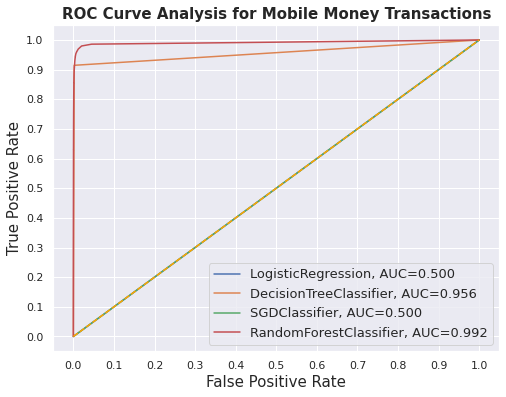

In [13]:
# Plot the figure
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Mobile Money Transactions', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
fig.savefig('multiple_roc_curve.png')